## A problem of populations

We return to the [Brexit survey](../exercises/brexit_analysis).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fancy plots
plt.style.use('fivethirtyeight')

# Data frame library
import pandas as pd

We load the data:

In [2]:
# Load the data frame, and put it in the variable "audit_data"
audit_data = pd.read_table('audit_of_political_engagement_14_2017.tab')

Now get the ages for the Leavers and the Remainers:

In [3]:
# Drop rows where age is 0
good_data = audit_data.loc[audit_data['numage'] != 0]
# Get data frames for leavers and remainers
remain_ages = good_data[good_data['cut15'] == 1]['numage']
leave_ages = good_data[good_data['cut15'] == 2]['numage']

Show the age distributions for the two groups:

774

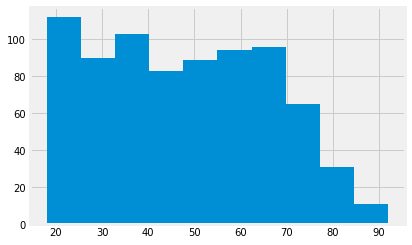

In [4]:
remain_ages.hist()
len(remain_ages)

541

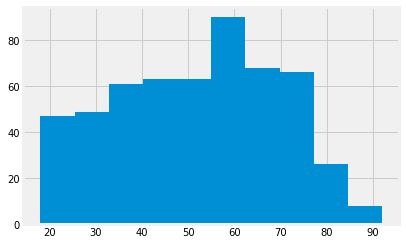

In [5]:
leave_ages.hist()
len(leave_ages)

These certainly look like different distributions.

We might summarize the difference, by looking at the difference in means:

In [6]:
leave_mean = np.mean(leave_ages)
leave_mean

51.715341959334566

In [7]:
remain_mean = np.mean(remain_ages)
remain_mean

48.01550387596899

In [8]:
difference = leave_mean - remain_mean
difference

3.6998380833655773

The distributions do look different.

They have a mean difference of nearly 4 years.

Could this be due to sampling error?

If we took two random samples of 774 and 541 voters, *from the same
population*, we would expect to see some difference, just by chance.

*By chance* means, because random samples vary.

What is the population, in this case?

It is not exactly the whole UK population, because the survey only sampled
people who were eligible to vote.

It might not even be the whole UK population, who are eligible to vote.
Perhaps the survey company got a not-representative range of ages, for some
reason.  We are not interested in that question, only the question of whether
the Leave and Remain voters could come from the same population, where the
population is, people selected by the survey company.

How do we find this population, to do our simulation?

## Population by permutation

Here comes a nice trick.   We can use the data that we already have, to
simulate the effect of drawing lots of random samples, from the underlying
population.

Let us assume that the Leave voters and the Remain voters are in fact samples
from the same underlying population.

If that is the case, we can throw the Leave and Remain voters into one big pool
of 774 + 541 == 1315 voters.

Then we can take split this new mixed sample into two groups, at random, one
with 774 voters, and the other with 541.  The new groups have a random mix of
the original Leave and Remain voters.  Then we calculate the difference in
means between these two new, fake groups.

In [9]:
pooled = np.append(leave_ages, remain_ages)
pooled

array([71, 60, 74, ..., 37, 67, 39])

In [10]:
len(pooled)

1315

We mix the two samples together, using `np.random.shuffle`.  It works like
this:

In [11]:
pets = np.array(['cat', 'dog', 'rabbit'])
pets

array(['cat', 'dog', 'rabbit'], dtype='<U6')

In [12]:
np.random.shuffle(pets)
pets

array(['rabbit', 'dog', 'cat'], dtype='<U6')

In [13]:
np.random.shuffle(pets)
pets

array(['rabbit', 'dog', 'cat'], dtype='<U6')

Now to mix up ages of the Leavers and Remainers:

In [14]:
np.random.shuffle(pooled)
pooled

array([43, 39, 27, ..., 41, 67, 69])

We split the newly mixed group into 774 simulated Remain voters and 541
simulated Leave voters, where each group is a random mix of the original Leave
and Remain ages.

In [15]:
# The first 774 values
fake_remainers = pooled[:774]
# The rest
fake_leavers = pooled[774:]
len(fake_leavers)

541

Now we can calculate the mean difference.  This is our first simulation:

In [16]:
fake_difference = np.mean(fake_leavers) - np.mean(fake_remainers)
fake_difference

-0.20998294860221733

That looks a lot smaller than the difference we saw.   We want to keep doing
this, to collect more simulations.  We need to mix up the ages again, to give
us new random samples of fake Remainers and fake Leavers.

In [17]:
np.random.shuffle(pooled)
fake_difference_2 = np.mean(pooled[:774]) - np.mean(pooled[774:])
fake_difference_2

-3.034069361456204

We want to keep doing this, but copy / pasting seems like far too much work.
We need - [iteration](iteration).